In [1]:
%cd /Users/ajorand/Documents/Polytech/iFrelon_imageDetection/Script/data_set

/Users/ajorand/Documents/Polytech/iFrelon_imageDetection/Script/data_set


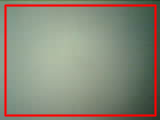

In [18]:
from wand.image import Image
from wand.drawing import Drawing
from wand.color import Color

# Load the background image
background = Image(filename ='empty.jpg')

# Define the dimensions of the background image
background_width = background.width
background_height = background.height

# Define the dimensions of the area where objects can be placed
object_area_left = 5
object_area_top = 5
object_area_width = background_width - 10
object_area_height = background_height - 10


# Draw the bounding box on the image
with Drawing() as draw:
    draw.stroke_color = Color('red')
    draw.stroke_width = 2
    draw.fill_opacity = 0
    draw.rectangle(left=object_area_left, top=object_area_top, right=object_area_left+object_area_width, bottom=object_area_top+object_area_height)
    draw(background)

# Save the image with the bounding box
background

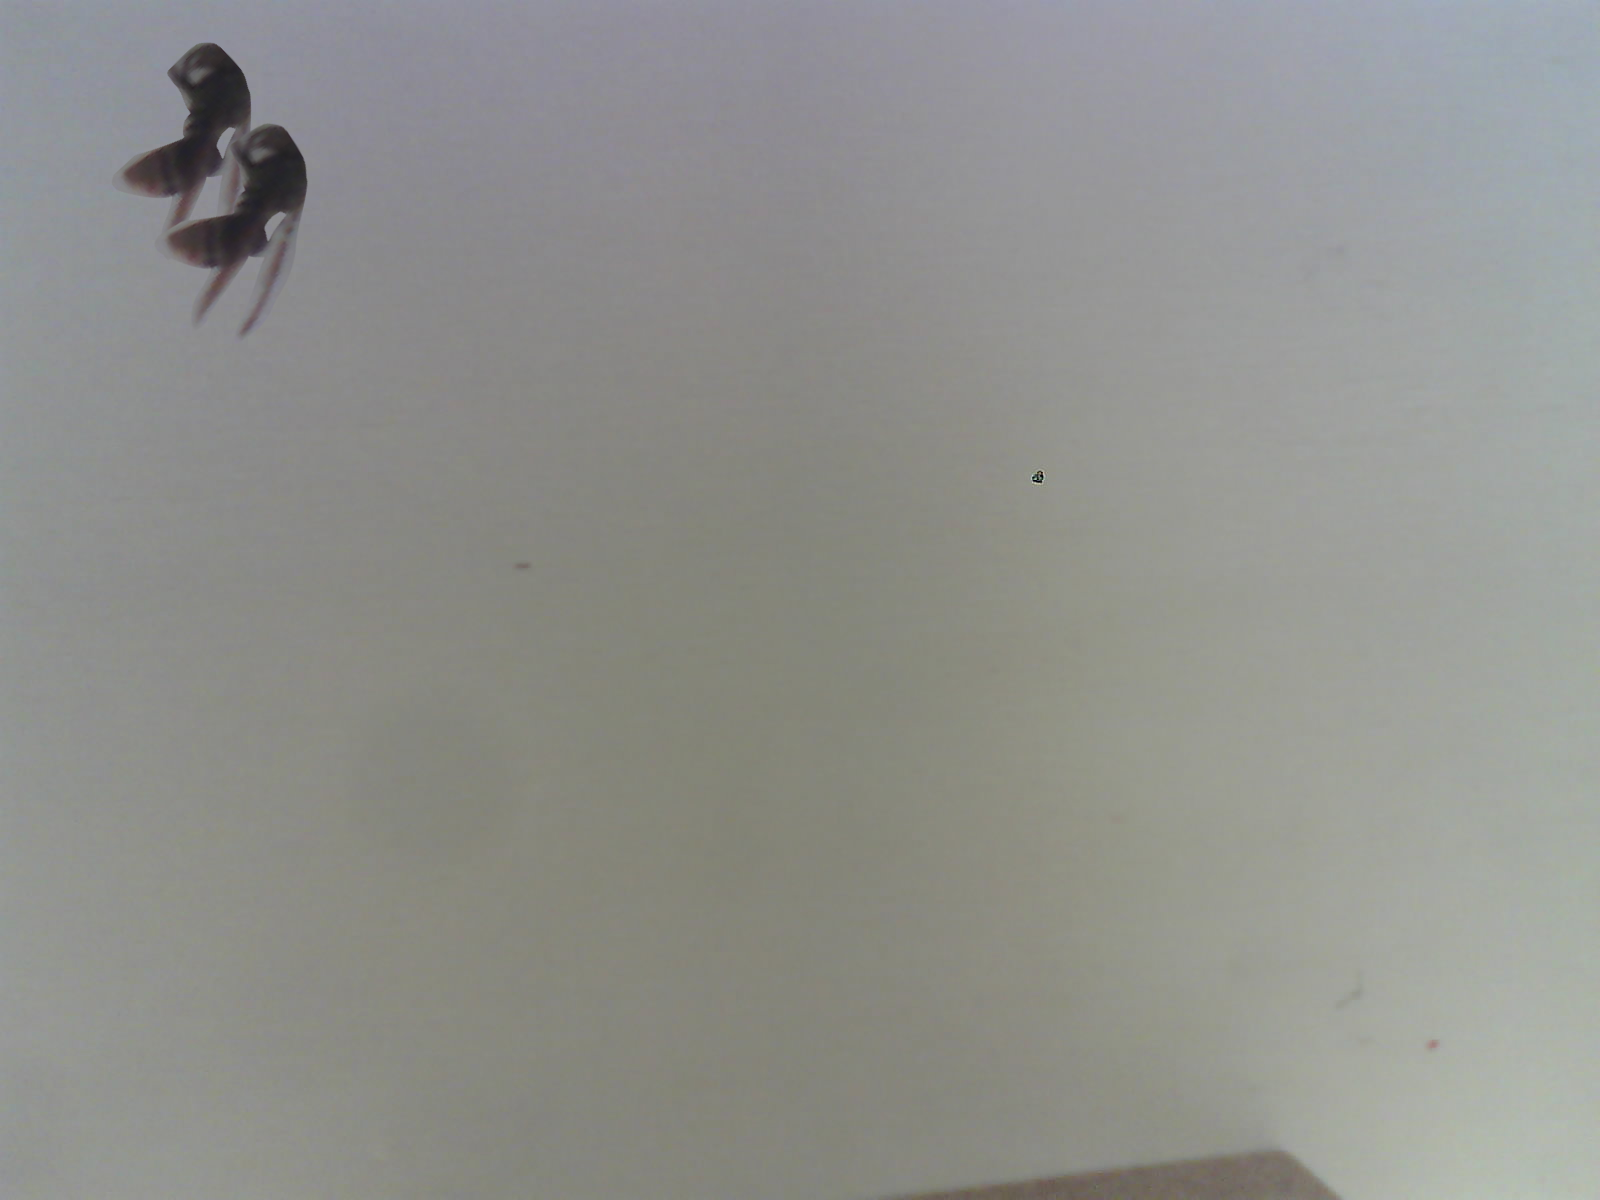

In [21]:
from wand.image import Image
import random
bg_image= Image(filename='empty.bmp')
obj_image = Image(filename="abeille.png")
canvas = Image(width=bg_image.width, height=bg_image.height) 
objects = []
label = 'm5_nut'
# Composite the background image onto the canvas
canvas.composite(bg_image, 0, 0)
# Composite the object image onto the canvas with a random x and y position within the canvas
for i in range(random.randrange(8)):
    obj_image.rotate(random.uniform(0, 360))
    object_width = obj_image.width
    object_height = obj_image.height


    # Place the object in a random position within the defined area
    #x = random.randint(object_area_left, object_area_left + object_area_width - object_width)
    x = random.randint(object_area_left, object_area_left + object_area_width - 34)
    #y = random.randint(object_area_top, object_area_top + object_area_height - object_height)
    y = random.randint(object_area_top, object_area_top + object_area_height - 34)
    
    
    # Check if the object overlaps with any previously placed objects
    overlap = False
    if len(objects)>0:
        for j in range(i-1):
            if (x < objects[j]['x'] + objects[j]['width'] and x + object_width > objects[j]['x'] and
                y < objects[j]['y'] + objects[j]['height'] and y + object_height > objects[j]['y']):
                overlap = True
                break
    # If there is no overlap, place the object on the background image
    if not overlap:
        canvas.composite(obj_image, x, y)
        objects.append({'label': label, 'x': x, 'y': y, 'width': object_width, 'height': object_height})

canvas

In [30]:
from wand.image import Image
from wand.color import Color
import random
import json


# Define the max number of objects to place on the background image
num_objects = 8

num_images = 200
bg_images = [Image(filename ='../bg1.bmp'),Image(filename ='../bg2.bmp'),Image(filename ='../bg3.bmp'),Image(filename ='../bg4.bmp'),Image(filename ='../bg5.bmp'),Image(filename ='../bg6.bmp'),Image(filename ='../bg7.bmp')]
obj_images = [Image(filename='../frelon_contour.png'),Image(filename='../frelon_contour.png'),Image(filename='../frelon_contour.png')]

label = 'bee'

bbox_json = {
    "version": 1,
    "type": "bounding-box-labels",
    "boundingBoxes": {
        
    }
}

for n in range(num_images):
    objects = []
    background = bg_images[random.randrange(len(bg_images))].clone()

    # Define the dimensions of the background image
    background_width = background.width
    background_height = background.height
    # Define the dimensions of the area where objects can be placed
    object_area_left = 25
    object_area_top = 0
    object_area_width = background_width-80
    object_area_height = background_height
    
    blur_amount = random.randrange(8)
    
    background.motion_blur(sigma=blur_amount, angle=-90)

    
    # Create a new image for each object
    for i in range(random.randrange(num_objects)):
        
        # Load the object image
        object_image = obj_images[random.randrange(len(obj_images))].clone()
        object_image.rotate(random.uniform(0, 360))

        object_width = object_image.width
        object_height = object_image.height

        object_image.resize(object_width, object_height)
        object_image.motion_blur(sigma=blur_amount, angle=-90)

        # Place the object in a random position within the defined area

        x = random.randint(object_area_left, object_area_left + object_area_width - object_width)
        y = random.randint(object_area_top, object_area_top + object_area_height - object_height)



        # Check if the object overlaps with any previously placed objects
        overlap = False
        if len(objects)>0:
            for j in range(len(objects)):
                if (x < objects[j]['x'] + objects[j]['width'] and x + object_width > objects[j]['x'] and
                    y < objects[j]['y'] + objects[j]['height'] and y + object_height > objects[j]['y']):
                    overlap = True
                    break
        # If there is no overlap, place the object on the background image
        if not overlap:
            background.composite(object_image, x, y)

            # Add the object's position and size to the list of placed objects
            objects.append({'label': label, 'x': x, 'y': y, 'width': object_width, 'height': object_height})

    # Save the new image with objects placed on top of the background
    #background.save(filename=f'output/new_image{n}.png')
    background.save(filename=f'./new_image{n}.png')
    bbox_json["boundingBoxes"].update({f'new_image{n}.png': objects})

with open('./bounding_boxes.labels','w+') as file:
        json.dump(bbox_json, file, indent = 4)

In [14]:
from wand.image import Image
from wand.color import Color
import random
import json


# Define the max number of objects to place on the background image
num_objects = 8

num_images = 20
bg_images = [Image(filename ='./bg_lum1.jpg'),Image(filename ='./bg_lum2.jpg'),Image(filename ='./bg_lum3.jpg'),Image(filename ='./bg_lum4.jpg'),Image(filename ='./bg_lum5.jpg'),Image(filename ='./bg_lum6.jpg')]
hornet_images = [Image(filename='./hornet_lum1.png'),Image(filename='./hornet_lum2.png'),Image(filename='./hornet_lum3.png'),Image(filename='./hornet_lum4.png'),Image(filename='./hornet_lum5.png'),Image(filename='./hornet_lum6.png')]
bee_images = [Image(filename='./bee_lum1.png'),Image(filename='./bee_lum2.png'),Image(filename='./bee_lum3.png'),Image(filename='./bee_lum4.png'),Image(filename='./bee_lum5.png'),Image(filename='./bee_lum6.png')]

label = 'hornet'

bbox_json = {
    "version": 1,
    "type": "bounding-box-labels",
    "boundingBoxes": {
        
    }
}

for n in range(num_images):
    objects = []
    background = bg_images[random.randrange(len(bg_images))].clone()

    # Define the dimensions of the background image
    background_width = background.width
    background_height = background.height
    # Define the dimensions of the area where objects can be placed
    object_area_left = 25
    object_area_top = 0
    object_area_width = background_width-80
    object_area_height = background_height
    
    blur_amount = random.randrange(8)
    
    background.motion_blur(sigma=blur_amount, angle=-90)

    
    # Create a new image for each object 1
    for i in range(random.randrange(num_objects)):
        
        # Load the object image
        object_image = hornet_images[random.randrange(len(hornet_images))].clone()
        object_image.rotate(random.uniform(0, 360))

        object_width = object_image.width
        object_height = object_image.height

        object_image.resize(object_width, object_height)
        object_image.motion_blur(sigma=blur_amount, angle=-90)

        # Place the object in a random position within the defined area

        x = random.randint(object_area_left, object_area_left + object_area_width - object_width)
        y = random.randint(object_area_top, object_area_top + object_area_height - object_height)



        # Check if the object overlaps with any previously placed objects
        overlap = False
        if len(objects)>0:
            for j in range(len(objects)):
                if (x < objects[j]['x'] + objects[j]['width'] and x + object_width > objects[j]['x'] and
                    y < objects[j]['y'] + objects[j]['height'] and y + object_height > objects[j]['y']):
                    overlap = True
                    break
        # If there is no overlap, place the object on the background image
        if not overlap:
            background.composite(object_image, x, y)

            # Add the object's position and size to the list of placed objects
            objects.append({'label': label, 'x': x, 'y': y, 'width': object_width, 'height': object_height})

##############################@
    # Create a new image for each object 2
    for i in range(random.randrange(num_objects)):
        
        # Load the object image
        object_image = bee_images[random.randrange(len(bee_images))].clone()
        object_image.rotate(random.uniform(0, 360))

        object_width = object_image.width
        object_height = object_image.height

        object_image.resize(object_width, object_height)
        object_image.motion_blur(sigma=blur_amount, angle=-90)

        # Place the object in a random position within the defined area

        x = random.randint(object_area_left, object_area_left + object_area_width - object_width)
        y = random.randint(object_area_top, object_area_top + object_area_height - object_height)



        # Check if the object overlaps with any previously placed objects
        overlap = False
        if len(objects)>0:
            for j in range(len(objects)):
                if (x < objects[j]['x'] + objects[j]['width'] and x + object_width > objects[j]['x'] and
                    y < objects[j]['y'] + objects[j]['height'] and y + object_height > objects[j]['y']):
                    overlap = True
                    break
        # If there is no overlap, place the object on the background image
        if not overlap:
            background.composite(object_image, x, y)

            # Add the object's position and size to the list of placed objects
            objects.append({'label': 'bee', 'x': x, 'y': y, 'width': object_width, 'height': object_height})

######################

    # Save the new image with objects placed on top of the background
    #background.save(filename=f'output/new_image{n}.png')
    background.save(filename=f'../output/new_image{n}.png')
    bbox_json["boundingBoxes"].update({f'new_image{n}.png': objects})

with open('./bounding_boxes.labels','w+') as file:
        json.dump(bbox_json, file, indent = 4)

In [23]:
from wand.image import Image
from wand.color import Color
import random
import json


# Define the max number of objects to place on the background image
num_objects = 8

num_images = 10
bg_images = [Image(filename ='./bg_lum6.jpg')]
hornet_images = [Image(filename='./hornet_lum6.png')]
bee_images = [Image(filename='./bee_lum6.png')]

label = 'hornet'

bbox_json = {
    "version": 1,
    "type": "bounding-box-labels",
    "boundingBoxes": {
        
    }
}

for n in range(num_images):
    objects = []
    background = bg_images[random.randrange(len(bg_images))].clone()

    # Define the dimensions of the background image
    background_width = background.width
    background_height = background.height
    # Define the dimensions of the area where objects can be placed
    object_area_left = 25
    object_area_top = 0
    object_area_width = background_width-80
    object_area_height = background_height
    
    blur_amount = random.randrange(8)
    
    background.motion_blur(sigma=blur_amount, angle=-90)

    
    # Create a new image for each object 1
    #for i in range(random.randrange(num_objects)+1):
    for i in range(0):
        
        # Load the object image
        object_image = hornet_images[random.randrange(len(hornet_images))].clone()
        object_image.rotate(random.uniform(0, 360))

        object_width = object_image.width
        object_height = object_image.height

        object_image.resize(object_width, object_height)
        object_image.motion_blur(sigma=blur_amount, angle=-90)

        # Place the object in a random position within the defined area

        x = random.randint(object_area_left, object_area_left + object_area_width - object_width)
        y = random.randint(object_area_top, object_area_top + object_area_height - object_height)



        # Check if the object overlaps with any previously placed objects
        overlap = False
        if len(objects)>0:
            for j in range(len(objects)):
                if (x < objects[j]['x'] + objects[j]['width'] and x + object_width > objects[j]['x'] and
                    y < objects[j]['y'] + objects[j]['height'] and y + object_height > objects[j]['y']):
                    overlap = True
                    break
        # If there is no overlap, place the object on the background image
        if not overlap:
            background.composite(object_image, x, y)

            # Add the object's position and size to the list of placed objects
            objects.append({'label': label, 'x': x, 'y': y, 'width': object_width, 'height': object_height})

##############################@
    # Create a new image for each object 2
    for i in range(random.randrange(num_objects)+1):
    #for i in range(0):
        
        # Load the object image
        object_image = bee_images[random.randrange(len(bee_images))].clone()
        object_image.rotate(random.uniform(0, 360))

        object_width = object_image.width
        object_height = object_image.height

        object_image.resize(object_width, object_height)
        object_image.motion_blur(sigma=blur_amount, angle=-90)

        # Place the object in a random position within the defined area

        x = random.randint(object_area_left, object_area_left + object_area_width - object_width)
        y = random.randint(object_area_top, object_area_top + object_area_height - object_height)



        # Check if the object overlaps with any previously placed objects
        overlap = False
        if len(objects)>0:
            for j in range(len(objects)):
                if (x < objects[j]['x'] + objects[j]['width'] and x + object_width > objects[j]['x'] and
                    y < objects[j]['y'] + objects[j]['height'] and y + object_height > objects[j]['y']):
                    overlap = True
                    break
        # If there is no overlap, place the object on the background image
        if not overlap:
            background.composite(object_image, x, y)

            # Add the object's position and size to the list of placed objects
            objects.append({'label': 'bee', 'x': x, 'y': y, 'width': object_width, 'height': object_height})

######################

    # Save the new image with objects placed on top of the background
    #background.save(filename=f'output/new_image{n}.png')
    background.save(filename=f'../output/new_image{n}.png')
    bbox_json["boundingBoxes"].update({f'new_image{n}.png': objects})

with open('../output/bounding_boxes.labels','w+') as file:
        json.dump(bbox_json, file, indent = 4)